Bands are sorted by their founding date, so it would be easier to find the origins of certain genres or themes.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

bands = pd.read_csv('data/ma_bands_data.csv', index_col=0).sort_values('date').reset_index(drop=True)

In [2]:
bands['theme'] = bands['theme'].fillna('')

In [3]:
bands

,name,url,genre,theme,label,country,location,status,date,years
0,Olympic,https://www.metal-archives.com/bands/Olympic/3...,Pop Rock; Heavy Metal/Hard Rock (mid),,NaN,Czechia,Prague,Active,1962.0,1962-present
1,Orient,https://www.metal-archives.com/bands/Orient/51156,Hard Rock (early); Heavy Metal (later),"['Sex', ' Evil']",Unsigned/independent,Czechia,Prague,Active,1964.0,"1964-1990,1998-present"
2,Scorpions,https://www.metal-archives.com/bands/Scorpions...,Heavy Metal/Hard Rock,"['Life', ' Society', ' Love', ' Sex', ' Inner ...",NaN,Germany,"Hannover, Lower Saxony",Active,1964.0,1964-present
3,Faithful Breath,https://www.metal-archives.com/bands/Faithful_...,Progressive Rock (early); Heavy Metal/Hard Roc...,"['Adventure', ' Fantasy', ' Women']",NaN,Germany,"Witten, North Rhine-Westphalia",Changed name,1967.0,"1966-1967 (as),1967-1986,1986-1993 (as)"
4,Limelight,https://www.metal-archives.com/bands/Limelight...,NWOBHM/Heavy Metal/Hard Rock,"['Life', ' Feelings', ' Love', ' Thoughts']",NaN,United Kingdom,"Mansfield, Nottinghamshire, England",Split-up,1967.0,"1967-?,1997"
...,...,...,...,...,...,...,...,...,...,...
129466,כף הקלע,https://www.metal-archives.com/bands/%D7%9B%D7...,Black/Death Metal/Crust Punk,,Unsigned/independent,Israel,"Haifa, Haifa",Active,NaN,NaN
129467,ᛋᚢᚱᛏᚱ ᚹᛟᚢᚾᛞᛋ,https://www.metal-archives.com/bands/%E1%9B%8B...,"Raw Black Metal, Dark Ambient",,NaN,United Kingdom,NaN,Active,NaN,NaN
129468,こくまろみるく,https://www.metal-archives.com/bands/%E3%81%93...,Experimental Power Metal,"['The bizarre', ' Macabre']",Unsigned/independent,Japan,NaN,Active,NaN,NaN
129469,ノストラダムス,https://www.metal-archives.com/bands/%E3%83%8E...,Progressive Metal,,NaN,Japan,NaN,Split-up,NaN,NaN


# Vectorization

First of all, I need to vectorize the genres that each band belongs to, with 0 or 1 denoting whether a band belongs to a specific genre.

A band that belongs to both black metal and death metal would often be labelled as "Black/Death Metal", so I decided to drop the words "Metal" and "Rock", and "/" would be considered a separator. Since there are also metal genres fused together like "Industrial Black Metal", I consider such bands belonging to both "Industrial" and "Black" genres as they exhibit traits from both. Some bands changed genres as they developed, and I consider them to belong in all the genres they have ever been in. Labels like "(early)", "(mid)", or "(later)" would be dropped. Bands labelled as "with X influences" would be simply considered as belonging in "X" genre.

There have been some very specific labelled that occurred very few times, which I consider as errors. I dropped words that occurred less than 10 times. Since identifying bands belonging in niche genres is something that interests us, the threshold is kept small.

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
vectorizer = CountVectorizer(binary=True, token_pattern="middle eastern|[0-9a-z'\-]+", min_df=10,
                             stop_words=['metal', 'rock', "'n'", 'roll', 'early', 'mid', 'later',
                                         'and', 'elements', 'influences', 'various', 'with'])
genre_mat = vectorizer.fit_transform(bands['genre'])
genre_names = vectorizer.get_feature_names_out()
print(genre_names)

['acoustic' 'alternative' 'ambient' 'aor' 'atmospheric' 'avant-garde'
 'black' 'blackened' 'blues' 'brutal' 'celtic' 'classical' 'crossover'
 'crust' 'crustcore' 'cybergrind' 'd-beat' 'dark' 'darkwave' 'death'
 'deathcore' 'depressive' 'djent' 'doom' 'drone' 'dungeon' 'electronic'
 'electronica' 'epic' 'experimental' 'extreme' 'folk' 'funeral' 'funk'
 'fusion' 'glam' 'goregrind' 'gothic' 'grind' 'grindcore' 'groove'
 'grunge' 'hard' 'hardcore' 'heavy' 'industrial' 'jazz' 'mathcore'
 'medieval' 'melodic' 'metalcore' 'middle eastern' 'neoclassical'
 'neofolk' 'noise' 'noisecore' 'noisegrind' 'nu-metal' 'nwobhm' 'oi'
 'operatic' 'pagan' 'pop' 'post-black' 'post-hardcore' 'post-metal'
 'post-punk' 'post-rock' 'power' 'powerviolence' 'progressive'
 'psychedelic' 'punk' 'rac' 'raw' 'shoegaze' 'shred' 'slam' 'sludge'
 'southern' 'speed' 'stoner' 'symphonic' 'synth' 'technical' 'thrash'
 'viking']


A special case would be bands belonging in "Middle Eastern Folk" genres, as "Middle Eastern" is two words, which could lead to confusion between "Middle Eastern" and "Eastern". So I treated it differently in the regex.

In [6]:
bands[bands['genre'].str.lower().str.contains('eastern')].head()

,name,url,genre,theme,label,country,location,status,date,years
5825,Pentagram,https://www.metal-archives.com/bands/Pentagram...,Thrash Metal (early); Heavy/Middle Eastern Fol...,"['Metal', ' War', ' Misery (early); Suicide', ...",NaN,Türkiye,Istanbul,Active,1987.0,"1987-present,2001-present (as)"
13991,Orphaned Land,https://www.metal-archives.com/bands/Orphaned_...,Doom/Death/Middle Eastern Folk Metal (early); ...,"['Abrahamic religions', ' Unity', ' Peace']",NaN,Israel,"Bat Yam, Tel Aviv / Petah Tikva, Central",Active,1992.0,"1991-1992 (as),1992-1997,2001-present"
16744,Melechesh,https://www.metal-archives.com/bands/Melechesh...,Black/Death/Middle Eastern Folk Metal,['Mesopotamian mythology'],NaN,International,Jerusalem/Bethlehem (early); Netherlands/Franc...,Active,1993.0,1993-present
21990,Blaakyum,https://www.metal-archives.com/bands/Blaakyum/...,Thrash/Heavy/Middle Eastern Folk Metal,"['Conceptual (thematic)', ' Symbolic', ' Socia...",Unsigned/independent,Lebanon,"Beirut / Antelias, Matn",Active,1995.0,"1995-2001,2007-present"
24727,Distorted,https://www.metal-archives.com/bands/Distorted...,Gothic/Melodic Death Metal with Middle Eastern...,"['Depression', ' Romance', ' Hypocrisy']",NaN,Israel,"Bat Yam, Tel Aviv",Active,1996.0,"1996-2010,2022-present"


The vectorization of themes are different in a way that each quoted or parenthesized is treated as a token. Though labels like "(early)", "(mid)", or "(later)" would be dropped.

In [7]:
vectorizer = CountVectorizer(binary=True, token_pattern="[0-9a-z][0-9a-z'\-/\s]*[0-9a-z]", min_df=10,
                             stop_words=['early', 'mid', 'later'])
theme_mat = vectorizer.fit_transform(bands['theme'])
theme_names = vectorizer.get_feature_names_out()
print(theme_names)

['abandonment' 'aberrations' 'abortion' ... 'youth' 'zombie' 'zombies']


In [8]:
bands[bands['theme'].str.lower().str.contains('early').fillna(False)].head()

,name,url,genre,theme,label,country,location,status,date,years
9,Sir Lord Baltimore,https://www.metal-archives.com/bands/Sir_Lord_...,Heavy Metal/Hard Rock,"['Love', ' Women', ' Life (early); Christianit...",Unsigned/independent,United States,"New York, New York",Split-up,1968.0,"1968-1972,1977,2005-2006"
72,Rainbow,https://www.metal-archives.com/bands/Rainbow/108,Hard Rock/Heavy Metal,"['Fantasy', ' Rock (early); Relationships', ' ...",NaN,United States,"Los Angeles, California / Connecticut / New York",Active,1975.0,"1975 (as),1976-1984,1994-1997,2015-present"
122,Diamond Head,https://www.metal-archives.com/bands/Diamond_H...,"NWOBHM, Heavy Metal/Hard Rock","['Fantasy', ' Fiction', ' Love (early); Societ...",NaN,United Kingdom,"Stourbridge, West Midlands, England",Active,1976.0,"1976-1985,1991-1994,2000-present"
387,V8,https://www.metal-archives.com/bands/V8/3236,Heavy Metal,"['Violence', ' Rebellion', ' Religion', ' Soci...",NaN,Argentina,Buenos Aires,Split-up,1979.0,"1979-1987,1996"
404,Nightmare,https://www.metal-archives.com/bands/Nightmare...,Heavy/Power Metal,"['Life', ' Rock (early); Fantasy', ' Armageddo...",NaN,France,"Grenoble, Auvergne-Rhône-Alpes",Active,1979.0,"1979-1988,1999-present"


As the size of data is quite large, K-means clustering is used. We use silhouette coefficient to benchmark the performance of clustering at different number of clusters.

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def kmeans_benchmark(data, x):
    y = list()
    
    for n in x:
        kmeans = KMeans(n_clusters=n, random_state=0)
        kmeans.fit(data)
        #print('fit', n, end='\r')
        y.append(silhouette_score(data, kmeans.labels_, sample_size=1000, random_state=0))
        #print('score', n, end='\r')

    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Coefficient')
    plt.plot(x, y);

# 1. By Genre

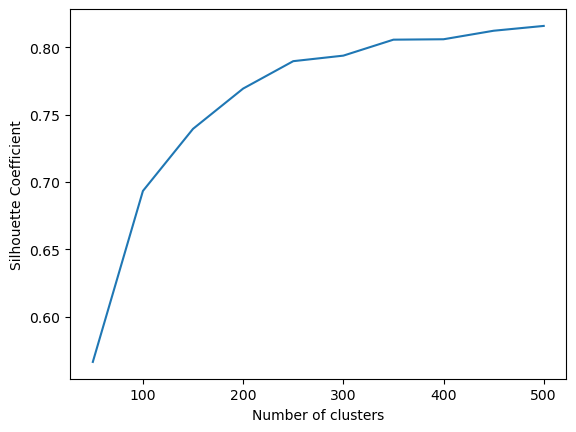

In [10]:
kmeans_benchmark(genre_mat, range(50, 550, 50))

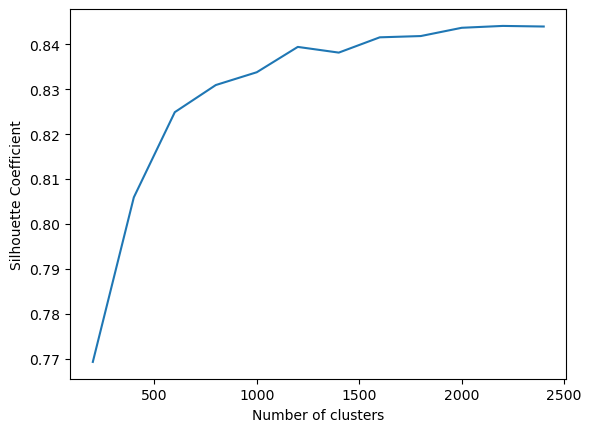

In [11]:
kmeans_benchmark(genre_mat, range(200, 2600, 200))

Although the theoretical optimal number of clusters would be the point that maximizes the silhouette coefficient, we decided to set the number of clusters to 300 for the sake of simplifying the analysis, as further increase in the number of clusters only result in relatively small improvements.

You might be asking that, aren't metal bands already categorized, or clustered together in their respective genres? But as the vectorization part has shown, many metal bands cannot be fit into a single genre. There also exists many subgenres and intersections between genres. These all prove the necessity to cluster metal bands by their genres.

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=300, random_state=0)
kmeans.fit(genre_mat)
kmeans.labels_

array([ 5,  5,  5, ...,  6, 14, 29], dtype=int32)

In [15]:
groups = bands.groupby(kmeans.labels_)
groups.size()

0       1838
1       3690
2      10898
3        984
4      15623
       ...  
295       30
296       36
297       20
298       26
299       18
Length: 300, dtype: int64

These are the 5 earliest bands within each genre cluster.

In [16]:
groups['name'].apply(lambda x: x.iloc[: 5].reset_index(drop=True)).unstack()

,0,1,2,3,4
0,Turbo,Witch Slayer,Wrathchild America,Warlock Texas,Raw
1,Rax,Alucard,Benefits Forgot,Cenotaph,Hypocrite
2,Graf Spee,Necrophagia,Imperator,Аясын Салхи,Belial
3,Nifleheim,Fiendish Nymph,Ancient Wisdom,Bran,Thy Repentance
4,Skull Face,Veneno Maldito,Mayhem,Sacred Hades,Fantom
...,...,...,...,...,...
295,Black Messiah,Inchiuvatu,Nokturnal Mortum,Ashen Light,Munruthel
296,Infernal Poetry,Serenity in Silence,Spire,Incoming Cerebral Overdrive,Abyss
297,Manilla Road,Полигон,Enchanter,Ageless Wisdom,Marauder
298,Aethra,Skylark,伝承歌劇団～エウロパの軌跡～,Eddy Antonini,Orion Riders


These are the most important genres sorted descending according to the average of the genre weights.

In [17]:
top_pos = np.argsort(kmeans.cluster_centers_)[:, -1 : -6 : -1]
genre_names[top_pos]

array([['heavy', 'thrash', 'melodic', 'black', 'crossover'],
       ['melodic', 'death', 'heavy', 'viking', 'epic'],
       ['death', 'heavy', 'avant-garde', 'power', 'stoner'],
       ...,
       ['heavy', 'power', 'epic', 'black', 'folk'],
       ['symphonic', 'melodic', 'power', 'hard', 'gothic'],
       ['industrial', 'progressive', 'electronic', 'psychedelic',
        'experimental']], dtype=object)

These are the average weights of the most important genres.

In [18]:
top = np.sort(kmeans.cluster_centers_)[:, -1 : -6 : -1]
np.round(top, 2)

array([[1.  , 1.  , 0.02, 0.01, 0.01],
       [1.  , 1.  , 0.01, 0.01, 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  ],
       ...,
       [1.  , 1.  , 1.  , 0.1 , 0.05],
       [1.  , 1.  , 1.  , 0.04, 0.04],
       [1.  , 1.  , 0.11, 0.06, 0.06]])

The following is to discover whether each genre cluster has the tendency towards certain themes. This is done by a matrix multiplication, which averages the theme vectors of the bands belonging to each cluster.

In [19]:
from scipy.sparse import csr_matrix

selector = csr_matrix((np.ones(genre_mat.shape[0]), (kmeans.labels_, np.arange(genre_mat.shape[0]))),
                      (kmeans.cluster_centers_.shape[0], genre_mat.shape[0]))
theme_by_genre = selector / selector.sum(axis=1) * theme_mat

These are the most important themes sorted descending according to the average of the theme weights.

In [20]:
top_pos = np.argsort(theme_by_genre)[:, -1 : -6 : -1]
theme_names[top_pos]

array([['war', 'death', 'society', 'life', 'politics'],
       ['death', 'war', 'life', 'society', 'darkness'],
       ['death', 'gore', 'war', 'violence', 'horror'],
       ...,
       ['fantasy', 'history', 'battles', 'metal', 'war'],
       ['fantasy', 'love', 'nature', 'dreams', 'wizards'],
       ['instrumental', 'science fiction', 'mythology', 'feelings',
        'romanticism']], dtype=object)

These are the average weights of the most important themes.

In [21]:
top = np.sort(theme_by_genre)[:, -1 : -6 : -1]
np.round(top, 2)

array([[0.05, 0.05, 0.04, 0.04, 0.03],
       [0.11, 0.04, 0.04, 0.03, 0.03],
       [0.25, 0.11, 0.06, 0.05, 0.04],
       ...,
       [0.45, 0.2 , 0.1 , 0.1 , 0.1 ],
       [0.31, 0.19, 0.08, 0.08, 0.04],
       [0.17, 0.11, 0.06, 0.06, 0.06]])

# 2. By Theme

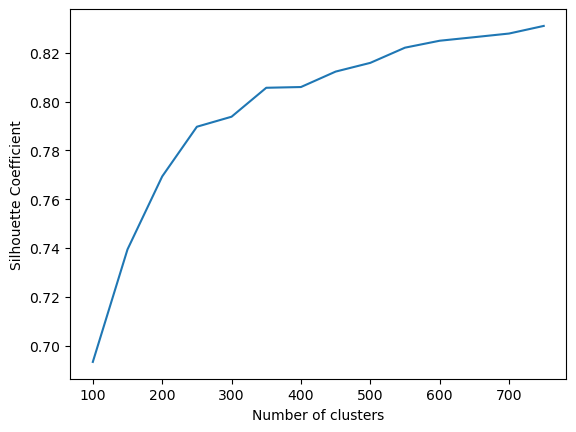

In [13]:
kmeans_benchmark(genre_mat, range(100, 800, 50))

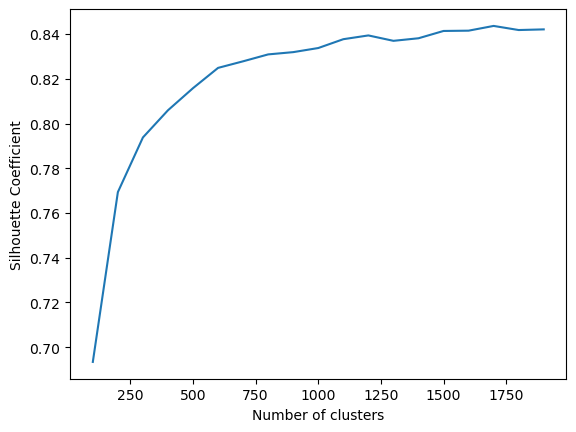

In [12]:
kmeans_benchmark(genre_mat, range(100, 2000, 100))

The number of clusters according to themes is set at 700, also for the ease of analysis. 

In [22]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=700, random_state=0)
kmeans.fit(theme_mat)
kmeans.labels_

array([  1, 234, 175, ...,   1,   1,   1], dtype=int32)

In [23]:
groups = bands.groupby(kmeans.labels_)
groups.size()

0         22
1      65028
2        344
3         39
4        268
       ...  
695       73
696        1
697        1
698       21
699       80
Length: 700, dtype: int64

These are the 5 earliest bands within each theme cluster.

In [24]:
groups['name'].apply(lambda x: x.iloc[: 5].reset_index(drop=True)).unstack()

,0,1,2,3,4
0,Noplacetohide,Never Say Never,Six Flying Putanas,Procaos,SkyFall
1,Olympic,Cool Feet,Ash,Flower Travellin' Band,Back Out
2,Törr,Sabbrabells,Black Shepherd,Deliverance,Root
3,Diabolic Possession,Krabathor,Abhorrent,Bludgeon,Interior Soul
4,Argus,Leatherwolf,H. Kristal,Creepin' Death,Sanity
...,...,...,...,...,...
695,Crazy Lazy,Overlord,Rampage,Valium,Liquid Mirror
696,Rage,NaN,NaN,NaN,NaN
697,Noctysmal,NaN,NaN,NaN,NaN
698,Turbo,Manowar,Panther,Kalabouço,Rosae Crucis


These are the most important genres sorted descending according to the average of the theme weights.

In [25]:
top_pos = np.argsort(kmeans.cluster_centers_)[:, -1 : -6 : -1]
theme_names[top_pos]

array([['politics', 'hate', 'war', 'anger', 'social'],
       ['folklore', 'freedom', 'beer', 'corruption', 'zombies'],
       ['occultism', 'satanism', 'war', 'paganism', 'evil'],
       ...,
       ['individualism', 'paranormal', 'occult', 'self-reflection',
        'cosmos'],
       ['war', 'glory', 'honour', 'pride', 'battles'],
       ['serial killers', 'gore', 'murder', 'perversions', 'necrophilia']],
      dtype=object)

These are the average weights of the most important themes.

In [26]:
top = np.sort(kmeans.cluster_centers_)[:, -1 : -6 : -1]
np.round(top, 2)

array([[1.  , 1.  , 0.18, 0.09, 0.09],
       [0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 1.  , 0.06, 0.05, 0.04],
       ...,
       [1.  , 1.  , 1.  , 1.  , 1.  ],
       [1.  , 0.9 , 0.52, 0.14, 0.14],
       [1.  , 0.25, 0.2 , 0.04, 0.04]])

In [27]:
from scipy.sparse import csr_matrix

selector = csr_matrix((np.ones(theme_mat.shape[0]), (kmeans.labels_, np.arange(theme_mat.shape[0]))),
                      (kmeans.cluster_centers_.shape[0], theme_mat.shape[0]))
genre_by_theme = selector / selector.sum(axis=1) * genre_mat

These are the most important themes sorted descending according to the average of the genre weights.

In [28]:
top_pos = np.argsort(genre_by_theme)[:, -1 : -6 : -1]
genre_names[top_pos]

array([['death', 'thrash', 'melodic', 'grindcore', 'metalcore'],
       ['death', 'thrash', 'heavy', 'black', 'melodic'],
       ['black', 'death', 'thrash', 'doom', 'raw'],
       ...,
       ['atmospheric', 'black', 'viking', 'funeral', 'drone'],
       ['heavy', 'power', 'thrash', 'black', 'folk'],
       ['death', 'brutal', 'grindcore', 'thrash', 'doom']], dtype=object)

These are the average weights of the most important themes.

In [29]:
top = np.sort(genre_by_theme)[:, -1 : -6 : -1]
np.round(top, 2)

array([[0.55, 0.45, 0.36, 0.14, 0.09],
       [0.33, 0.23, 0.19, 0.17, 0.11],
       [0.87, 0.16, 0.07, 0.05, 0.03],
       ...,
       [1.  , 1.  , 0.  , 0.  , 0.  ],
       [0.52, 0.24, 0.19, 0.19, 0.14],
       [0.74, 0.24, 0.21, 0.15, 0.09]])

# 3. By Date and Location

In [6]:
bands_st = pd.read_csv('data/ma_bands_st.csv', index_col=0)
bands_st

,name,url,genre,theme,label,country,location,status,date,years,city,lat,lon
index,,,,,,,,,,,,,
2,Scorpions,https://www.metal-archives.com/bands/Scorpions...,Heavy Metal/Hard Rock,"['Life', ' Society', ' Love', ' Sex', ' Inner ...",NaN,Germany,"Hannover, Lower Saxony",Active,1964.0,1964-present,hannover,53.183333,8.516667
3,Faithful Breath,https://www.metal-archives.com/bands/Faithful_...,Progressive Rock (early); Heavy Metal/Hard Roc...,"['Adventure', ' Fantasy', ' Women']",NaN,Germany,"Witten, North Rhine-Westphalia",Changed name,1967.0,"1966-1967 (as),1967-1986,1986-1993 (as)",witten,51.433333,7.333333
4,Limelight,https://www.metal-archives.com/bands/Limelight...,NWOBHM/Heavy Metal/Hard Rock,"['Life', ' Feelings', ' Love', ' Thoughts']",NaN,United Kingdom,"Mansfield, Nottinghamshire, England",Split-up,1967.0,"1967-?,1997",mansfield,53.133333,-1.200000
5,Deep Purple,https://www.metal-archives.com/bands/Deep_Purp...,Heavy Metal/Hard Rock,"[""Rock 'n' Roll"", ' Love', ' Relationships', '...",NaN,United Kingdom,"Hertford, Hertfordshire, England",Active,1968.0,"1967-1968 (as),1968-1976,1984-present",hertford,51.800000,-0.066667
7,Ash,https://www.metal-archives.com/bands/Ash/35404...,Psychedelic Pop/Rock (early); Heavy Metal/Hard...,NaN,NaN,Australia,"Melbourne, Victoria",Split-up,1968.0,1968-1972,melbourne,-37.813938,144.963425
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128309,Manawydan,https://www.metal-archives.com/bands/Manawydan...,Black Metal,['History / Indigenous history'],Unsigned/independent,United States,"Columbus, Ohio",Active,2022.0,2022-present,columbus,33.758056,-86.753333
128310,Черновство,https://www.metal-archives.com/bands/%D0%A7%D0...,"Black Metal, Ambient",NaN,Unsigned/independent,Russia,"Tver, Tver Oblast",Active,2022.0,"?-2022 (as),2022-present",tver,56.860491,35.876027
128312,Cineres,https://www.metal-archives.com/bands/Cineres/3...,Melodic Black Metal,"['Philosophy', ' Abstract themes']",Unsigned/independent,Slovakia,"Nitra, Nitra",Active,2022.0,2022-present,nitra,48.316667,19.783333


(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36]), array([16293,  2744,  9278,   203,   403,   259,   736,   393,   319,
         509,   640,   579,   853,   234,  1245,   206,   279,  1264,
         238,   443,   261,   518,   289,   154,   684,   182,   310,
         341,   207,   259,   384,   524,   196,   361,   159,   159,
         168,   155]))
26136 42429


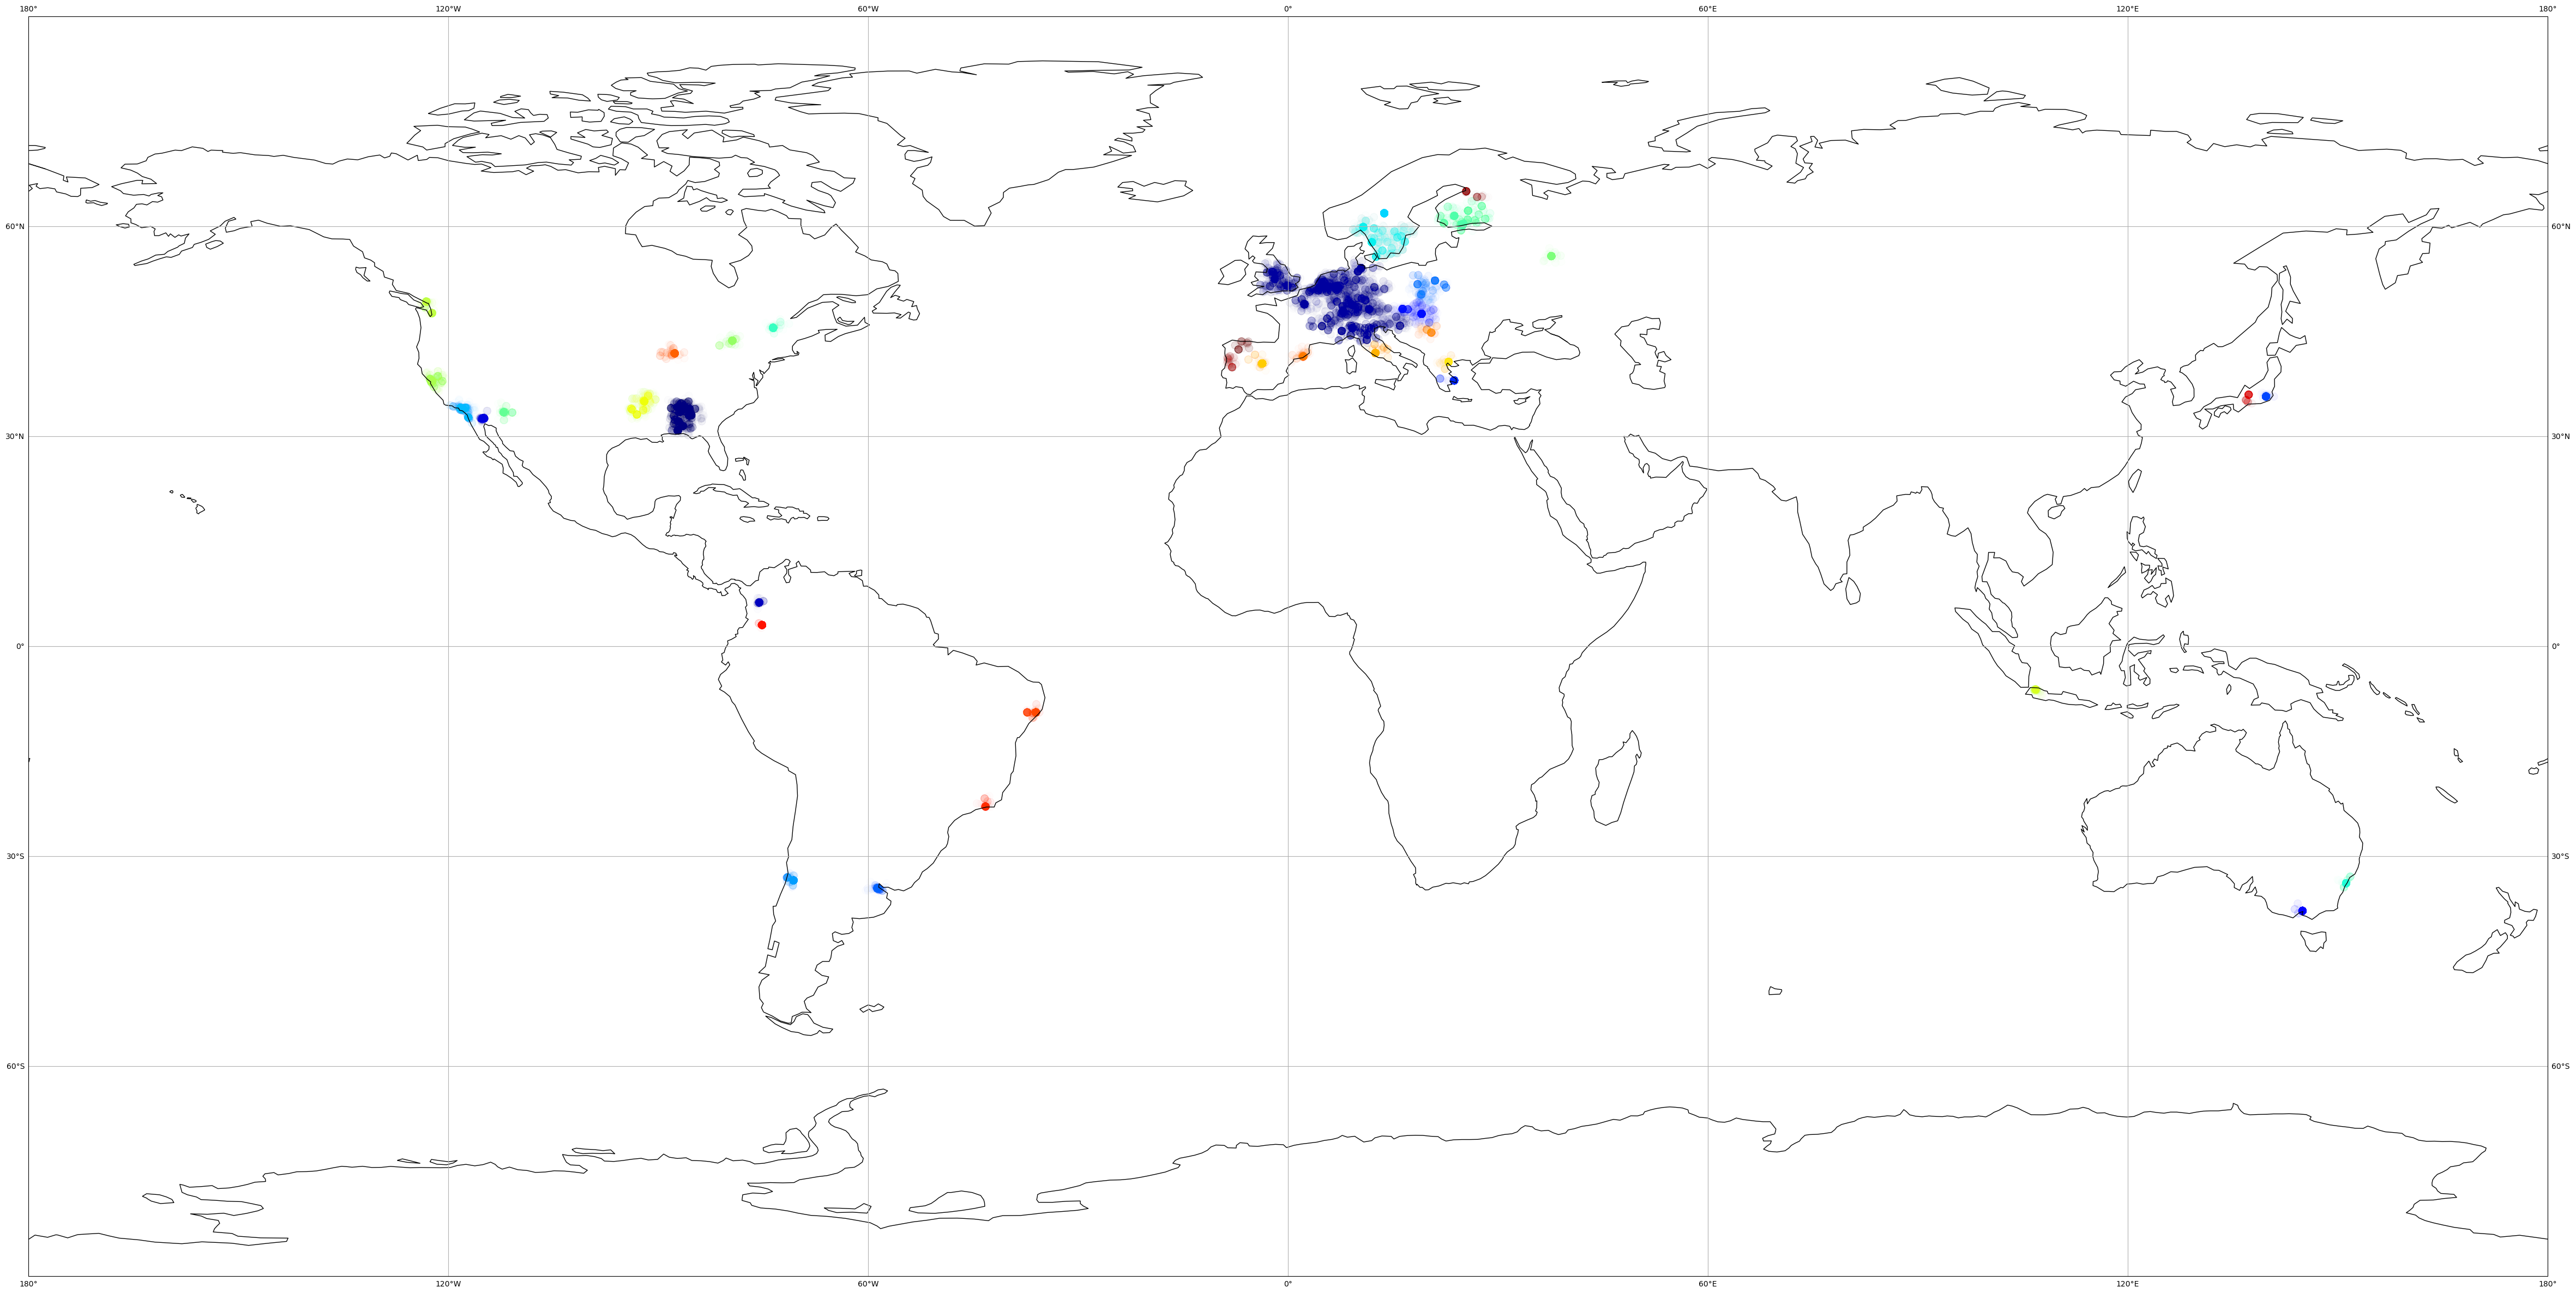

In [43]:
from sklearn.cluster import DBSCAN
import cartopy.crs as ccrs
import cartopy.feature as cf

date_group = bands_st[bands_st['date'].astype(int) // 10 == 200]
loc_rad = date_group[['lat', 'lon']].apply(np.radians)
dbscan = DBSCAN(eps=0.015, min_samples=150, metric='haversine')
dbscan.fit(loc_rad)
print(np.unique(dbscan.labels_, return_counts=True))
print(date_group[dbscan.labels_ >= 0].shape[0], date_group.shape[0])

fig = plt.figure(figsize=(60, 30))
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)

ax.scatter(date_group[dbscan.labels_ >= 0]['lon'], date_group[dbscan.labels_ >= 0]['lat'], marker='o', s=100,
           c=dbscan.labels_[dbscan.labels_ >= 0], alpha=1 / (0.5 * 150), cmap='jet',
           transform=proj)
ax.coastlines()
ax.set_extent([-180, 180, -90, 90])
ax.gridlines(draw_labels=True);